In [4]:
#Imports
import os
from pathlib import Path
from nufeb_tools import utils,plot, spatial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from joblib import Parallel, delayed
import joblib
import shutil
from matplotlib.animation import FuncAnimation
from celluloid import Camera

In [9]:
x = utils.get_data(directory=r'E:\sucrose\runs\Run_50_50_1.00e+00_1_2022-05-05_155756')


Missing HDF5 file


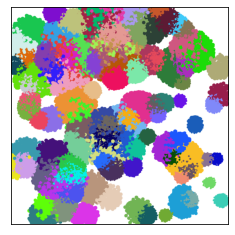

In [8]:
_ =plot.colony(x,35000)

In [10]:
x.colonies

,Timestep,ID,type,radius,x,y,z,biomass,time,mother_cell,total_biomass,Colony Area
0,0,77,2,6.700000e-07,0.000047,0.000074,1.490000e-06,289.761615,0.000000,77,289.761615,NaN
100,100,77,2,5.588648e-07,0.000046,0.000074,1.147830e-06,168.165426,0.277778,77,168.165426,NaN
238,200,77,2,4.284349e-07,0.000046,0.000074,8.748239e-07,75.765416,0.555556,77,75.765416,NaN
398,300,77,2,4.285690e-07,0.000046,0.000074,8.748239e-07,75.836551,0.833333,77,75.836551,NaN
558,400,77,2,4.287475e-07,0.000046,0.000074,8.748239e-07,75.931363,1.111111,77,75.931363,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2297584,35000,38174,1,8.018862e-07,0.000077,0.000020,9.202208e-06,799.150362,97.222222,5,235779.717638,48146.0
2297640,35000,38172,1,7.469987e-07,0.000077,0.000026,9.256815e-06,646.025684,97.222222,35,221578.565649,44747.0
2297813,35000,38176,1,7.873720e-07,0.000050,0.000054,9.216648e-06,756.537052,97.222222,26,149576.787452,25638.0
2297827,35000,38177,1,7.772515e-07,0.000054,0.000058,9.188319e-06,727.738031,97.222222,45,194539.349874,31293.0


In [12]:
df = x.colonies
df['total_biomass']=df.loc[df.Timestep == df.Timestep.iloc[-1]].groupby("mother_cell").sum().reset_index()["biomass"]

In [23]:
df[['mother_cell','total_biomass']].dropna().sort_values(by=['total_biomass']).reset_index(drop=True).loc[df.type == 1].mother_cell.unique()

array([ 76,  20,  19,  62,  84,  91,  35,  38,  16,  97,  55,  54, 100,
        96,  99,   9,  72,  26,  13,  93,  25,  81,  30,  52,  37,  43,
        41,  53,  86,  46,  18,  69,  82,  21,  24,  68,   2,  49,  60,
         4,  83,  47,  75,  61,   6,  79,  65,  58,  22,   8], dtype=int64)

In [21]:
np.sort(df.loc[df.type == 1].mother_cell.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [4]:
metrics = spatial.fitness_metrics(x)
sorted = metrics.sort_values(by=['total biomass']).loc[metrics.type==2].reset_index(drop=True)


Assigning ancestry: 100%|██████████| 350/350 [00:32<00:00, 10.74it/s]
c:\Users\sakkosjo\Anaconda3\envs\nufeb\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\Users\sakkosjo\Anaconda3\envs\nufeb\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [5]:
metrics

,mother_cell,type,Voronoi Area,IPTG,Time,Distance from center,total biomass,Nearest 1,Nearest 2,Nearest Neighbor,...,Z2_1,LogNearest 1,LogNearest 2,LogNearest,Inv1,Inv2,Log Inv1,Log Inv2,Colony Area,initial biomass
0,77,2,1.170798e-09,1.0,97.222222,0.000025,63824.553272,0.000012,0.000006,0.000006,...,154.882556,-11.308169,-12.026496,-12.026496,81484.574601,167124.798732,22.616338,24.052992,31416.0,289.761615
1,51,2,1.818968e-10,1.0,97.222222,0.000050,92396.670160,0.000008,0.000010,0.000008,...,250.024919,-11.719798,-11.547603,-11.719798,122982.625006,103528.544679,23.439597,23.095205,36813.0,252.555230
2,71,2,4.168337e-10,1.0,97.222222,0.000035,72296.901838,0.000003,0.000010,0.000003,...,270.020642,-12.738300,-11.470665,-12.738300,340544.072367,95861.989367,25.476600,22.941330,23895.0,104.232981
3,66,2,1.940576e-10,1.0,97.222222,0.000042,114358.539074,0.000008,0.000010,0.000008,...,270.020642,-11.776385,-11.470665,-11.776385,130142.487068,95861.989367,23.552770,22.941330,38324.0,202.939853
4,82,2,1.935495e-10,1.0,97.222222,0.000042,73275.716831,0.000012,0.000007,0.000007,...,173.845306,-11.325998,-11.910997,-11.910997,82950.427358,148895.110077,22.651997,23.821995,25326.0,240.900718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9,1,3.281651e-10,1.0,97.222222,0.000029,134768.005373,0.000006,0.000007,0.000006,...,184.694477,-12.072435,-11.850460,-12.072435,174981.409213,140148.835808,24.144870,23.700920,30251.0,602.918922
96,19,1,3.263852e-10,1.0,97.222222,0.000045,144788.926412,0.000006,0.000011,0.000006,...,275.659222,-12.012103,-11.449998,-12.012103,164736.598047,93901.142921,24.024206,22.899996,27368.0,1038.280010
97,40,1,1.536043e-10,1.0,97.222222,0.000045,118695.236983,0.000015,0.000004,0.000004,...,112.288363,-11.137283,-12.348093,-12.348093,68684.753109,230520.021925,22.274565,24.696186,36061.0,554.709214
98,25,1,1.642242e-10,1.0,97.222222,0.000045,283620.140916,0.000006,0.000011,0.000006,...,281.832260,-11.968701,-11.427851,-11.968701,157739.695054,91844.404175,23.937403,22.855702,59226.0,1392.747134


Assigning ancestry: 100%|██████████| 350/350 [00:25<00:00, 13.57it/s]


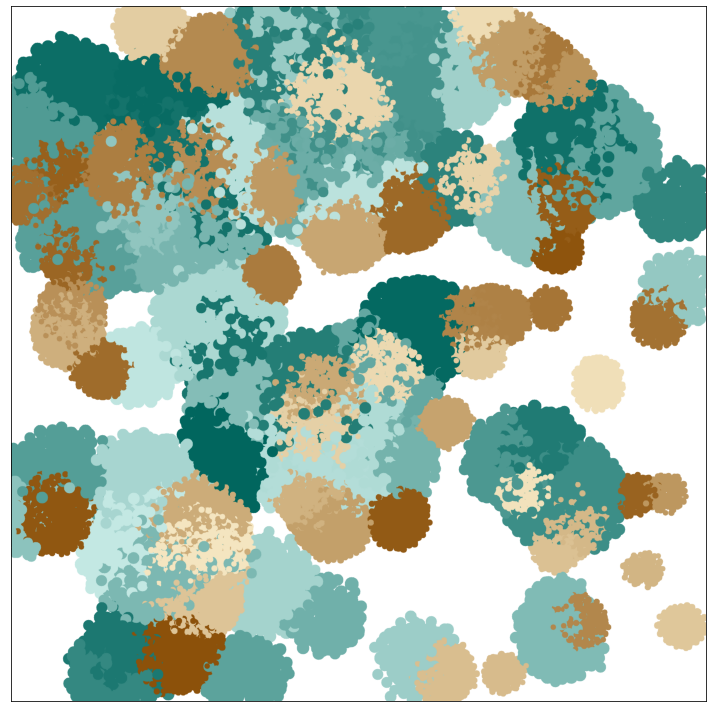

In [39]:
fig = plt.figure(figsize=(10,10))
camera = Camera(fig)
for i in np.linspace(1000,35000,35):
    _ =plot.colony(x,i,by='Species')
    fig.tight_layout()
    camera.snap()
for i in range (20):
    _ =plot.colony(x,35000,by='Species')
    fig.tight_layout()
    camera.snap()
animation = camera.animate()
animation.save('../media/high_iptg.gif', writer = 'imagemagick',fps=5)

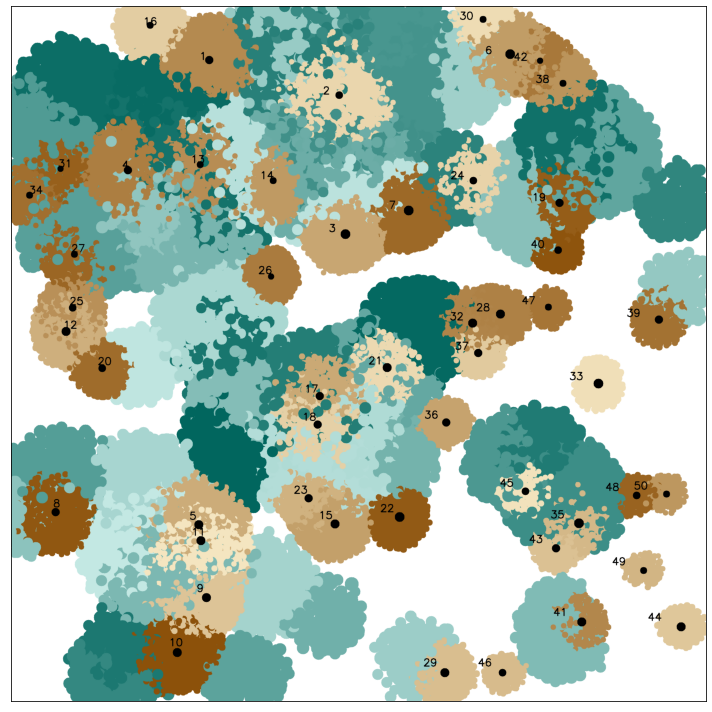

In [43]:
fig = plt.figure(figsize=(10,10))
camera = Camera(fig)
for i in np.linspace(1000,35000,35):
    _ =plot.colony(x,i,by='Species',fitness=metrics)
    fig.tight_layout()
    camera.snap()
for i in range (20):
    _ =plot.colony(x,35000,by='Species',fitness=metrics)
    fig.tight_layout()
    camera.snap()
animation = camera.animate()
animation.save('../media/high_iptg_labelled.gif', writer = 'imagemagick',fps=5)